In [36]:
# import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

print("libraries imported successfully")

libraries imported successfully


# Reading images

In [18]:
img = cv2.imread("people.jpg")

In [4]:
# view the image
cv2.imshow("People image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [7]:
cv2.imshow("Gray Image", img_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Gray Image')

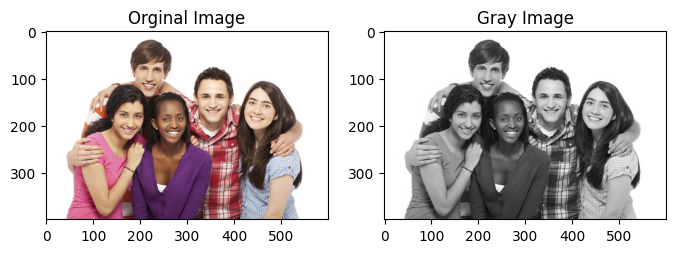

In [13]:
# create figure and axes
fig, axes = plt.subplots(1, 2, figsize = (8, 8))

# Display images
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))

# set the titles
axes[0].set_title("Orginal Image")
axes[1].set_title("Gray Image")


# Face Detection

In [14]:
# detect the face of the image
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(img_gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)


In [15]:
# display the image
cv2.imshow("Detected Faces", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Blurring an Image

In [32]:
# apply a Gaussian blur
blurred = cv2.GaussianBlur(img, (25, 25), 0)  # change the values to (15, 15), 0

cv2.imshow("Blurred Image", blurred)
cv2.waitKey(0)
cv2.destroyAllWindows() 

# Cropping an Image

In [33]:
img.size

720000

In [38]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [34]:
img.ndim

3

In [35]:
img.shape

(400, 600, 3)

In [39]:
img_array =np.asarray(img)

type(img_array)

numpy.ndarray

In [40]:
img.min()

0

In [42]:
img.max()
img.shape

(400, 600, 3)

In [43]:
#crop the image
cropped = img[100:600, 200:600]

cv2.imshow("Cropped Image", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Thresholding an Image

In [45]:
# apply the adaptive thresholding algorithm
thresh1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

Text(0.5, 1.0, 'Threshed Image using Adaptive')

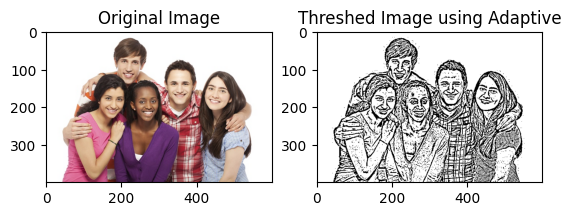

In [46]:
# create figure and axes
fig, axes = plt.subplots(1, 2)

# Display images
axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))

# set the titles
axes[0].set_title("Original Image")
axes[1].set_title("Threshed Image using Adaptive")

# Working with DICOM images

In [48]:
# import the library
import pydicom

print("imported successfully")

imported successfully


In [49]:
# read the dicom image
ds = pydicom.dcmread("1-01.dcm")

In [50]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7009.2401.227733523232226220904432144781
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19600101'
(0008, 0013) Instance Creation Time              TM: '172041'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Insta

In [51]:
# get the patient's name
ds.PatientName

'ACRIN-FLT-Breast_001'

In [52]:
# patients data element can be accessed by
name = ds["PatientName"]
name.VR, name.value, name.tag, name.VM

('PN', 'ACRIN-FLT-Breast_001', (0010, 0010), 1)

In [54]:
# view the data of the image
ds.PixelData

b'0\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\xf80\x

In [55]:
# convert the bytes to array
ds.pixel_array

array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       ...,
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16)

In [56]:
image = ds.pixel_array

In [58]:
image.min(), image.max()

(-2000, 2306)

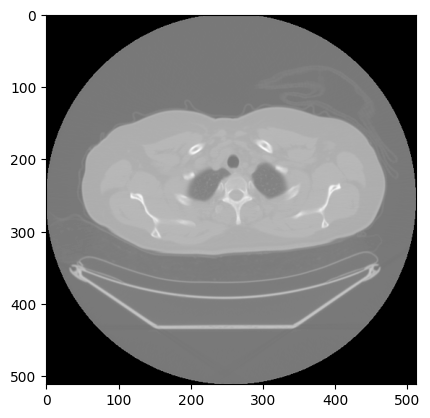

In [59]:
# let's display the image
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)